In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1 = df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

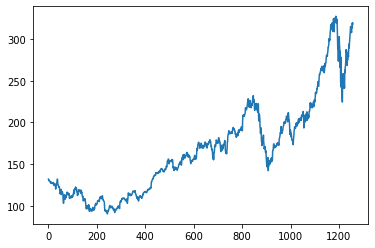

In [7]:
import matplotlib.pyplot as plt 
plt.plot(df1)

In [8]:
import numpy as np 

In [10]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [12]:
# splitting dataset into train and test split 
training_size = int(len(df1)*0.65)
test_size = len(df1) -training_size 
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [14]:
train_data.shape

(817, 1)

In [15]:
test_data.shape

(441, 1)

In [38]:
import numpy as np 

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        end_idx = i+time_step 
        
        a = dataset[i:end_idx, 0]
        b = dataset[end_idx, 0]
        dataX.append(a)
        dataY.append(b)
        
    return np.array(dataX), np.array(dataY)
        

In [39]:
# reshape into 
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 

In [57]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['Accuracy'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100,batch_size = 32,  verbose = 1)

Epoch 1/100
23/23 [==============================] - 8s 169ms/step - loss: 0.0097 - Accuracy: 0.0014 - val_loss: 0.0048 - val_Accuracy: 0.0029
Epoch 2/100
23/23 [==============================] - 3s 119ms/step - loss: 9.1058e-04 - Accuracy: 0.0014 - val_loss: 0.0042 - val_Accuracy: 0.0029
Epoch 3/100
23/23 [==============================] - 3s 120ms/step - loss: 6.5341e-04 - Accuracy: 0.0014 - val_loss: 0.0044 - val_Accuracy: 0.0029
Epoch 4/100
23/23 [==============================] - 3s 121ms/step - loss: 6.4878e-04 - Accuracy: 0.0014 - val_loss: 0.0041 - val_Accuracy: 0.0029
Epoch 5/100
23/23 [==============================] - 3s 122ms/step - loss: 5.9433e-04 - Accuracy: 0.0014 - val_loss: 0.0040 - val_Accuracy: 0.0029
Epoch 6/100
23/23 [==============================] - 3s 119ms/step - loss: 5.8667e-04 - Accuracy: 0.0014 - val_loss: 0.0034 - val_Accuracy: 0.0029
Epoch 7/100
23/23 [==============================] - 3s 120ms/step - loss: 7.7918e-04 - Accuracy: 0.0014 - val_loss: 0.004

23/23 [==============================] - 3s 118ms/step - loss: 2.0795e-04 - Accuracy: 0.0014 - val_loss: 0.0014 - val_Accuracy: 0.0029
Epoch 57/100
23/23 [==============================] - 3s 120ms/step - loss: 1.5517e-04 - Accuracy: 0.0014 - val_loss: 8.2004e-04 - val_Accuracy: 0.0029
Epoch 58/100
23/23 [==============================] - 3s 135ms/step - loss: 1.5930e-04 - Accuracy: 0.0014 - val_loss: 9.4988e-04 - val_Accuracy: 0.0029
Epoch 59/100
23/23 [==============================] - 3s 128ms/step - loss: 1.4698e-04 - Accuracy: 0.0014 - val_loss: 8.8994e-04 - val_Accuracy: 0.0029
Epoch 60/100
23/23 [==============================] - 3s 127ms/step - loss: 1.5523e-04 - Accuracy: 0.0014 - val_loss: 8.4083e-04 - val_Accuracy: 0.0029
Epoch 61/100
23/23 [==============================] - 3s 139ms/step - loss: 1.4532e-04 - Accuracy: 0.0014 - val_loss: 0.0011 - val_Accuracy: 0.0029
Epoch 62/100
23/23 [==============================] - 3s 135ms/step - loss: 1.8709e-04 - Accuracy: 0.0014 - v

In [71]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [72]:
X_test.shape

(341, 100, 1)

In [73]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [74]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.3677548049865

In [75]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

237.03390043827875

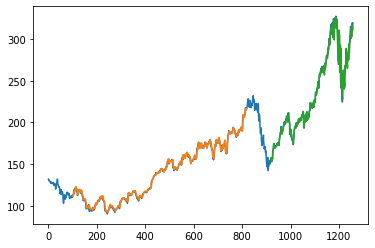

In [76]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()